## QUESTION 3
Calculate AR,I,MA and ARIMA and SARIMA for Australia AQI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("data_date.csv")
aus = df.loc[df['Country']=='Australia']
aus

,Date,Country,Status,AQI Value
6,2022-07-21,Australia,Moderate,56
148,2022-07-21,Australia,Moderate,54
290,2022-07-22,Australia,Moderate,66
431,2022-07-22,Australia,Good,45
572,2022-07-22,Australia,Good,42
...,...,...,...,...
10413,2023-04-13,Australia,Good,46
10553,2023-04-20,Australia,Good,32
10692,2023-04-27,Australia,Good,46
10831,2023-05-04,Australia,Good,34


In [3]:
aus["Date_New"]=pd.to_datetime(aus['Date'],dayfirst=True)
aus.drop(['Date'],axis = 1,inplace =True)
aus.set_index(aus['Date_New'],inplace = True)
aus


/tmp/ipykernel_40811/2592820884.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  aus["Date_New"]=pd.to_datetime(aus['Date'],dayfirst=True)
/tmp/ipykernel_40811/2592820884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus["Date_New"]=pd.to_datetime(aus['Date'],dayfirst=True)
/tmp/ipykernel_40811/2592820884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus.drop(['Date'],axis = 1,inplace =True)


,Country,Status,AQI Value,Date_New
Date_New,,,,
2022-07-21,Australia,Moderate,56,2022-07-21
2022-07-21,Australia,Moderate,54,2022-07-21
2022-07-22,Australia,Moderate,66,2022-07-22
2022-07-22,Australia,Good,45,2022-07-22
2022-07-22,Australia,Good,42,2022-07-22
...,...,...,...,...
2023-04-13,Australia,Good,46,2023-04-13
2023-04-20,Australia,Good,32,2023-04-20
2023-04-27,Australia,Good,46,2023-04-27


In [4]:
aus.drop(['Date_New'],axis = 1,inplace =True)
aus

/tmp/ipykernel_40811/3932590387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus.drop(['Date_New'],axis = 1,inplace =True)


,Country,Status,AQI Value
Date_New,,,
2022-07-21,Australia,Moderate,56
2022-07-21,Australia,Moderate,54
2022-07-22,Australia,Moderate,66
2022-07-22,Australia,Good,45
2022-07-22,Australia,Good,42
...,...,...,...
2023-04-13,Australia,Good,46
2023-04-20,Australia,Good,32
2023-04-27,Australia,Good,46


In [12]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import acf,pacf

pacf = pacf(aus['AQI Value'].dropna())
acf = acf(aus['AQI Value'].dropna())
print(pacf)
print(acf)


[ 1.          0.12017975  0.08572963  0.14044836 -0.25911357 -0.06438906
 -0.05905341  0.11992003  0.2220597   0.24988763  0.12397179  0.03442124
 -0.08459529 -0.04065519 -0.13340472 -0.13367304 -0.22183639  0.01323493
  0.03027456]
[ 1.00000000e+00  1.18658483e-01  9.64299164e-02  1.52554219e-01
 -1.98555874e-01 -8.09114093e-02 -8.20859891e-02 -4.41460773e-04
  1.97849378e-01  2.40548759e-01  2.08149245e-01  1.50648784e-01
  8.40736875e-04 -5.71097654e-02 -1.66126924e-01 -1.84085219e-01
 -1.56025304e-01  2.34754301e-02  9.25472682e-02]


In [24]:
# Fit an ARIMA model to sales data
order=(1,2,1) #(p,d,q)order
model=ARIMA(aus['AQI Value'],order=order)
results=model.fit()

#Forecast future sales values
forecast_steps=12
forecast=results.forecast(steps=forecast_steps)

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return ge

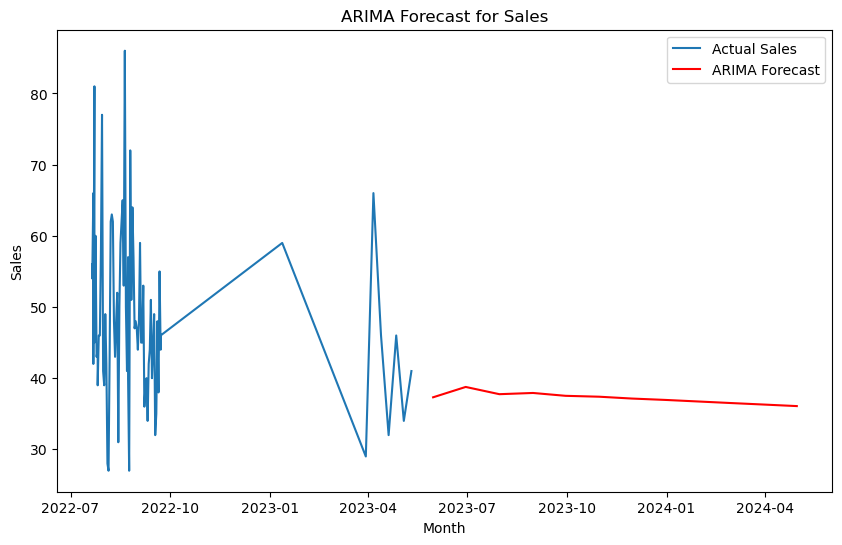

In [25]:
#Plot the original sales data and ARIMA forecast
plt.figure(figsize=(10,6))
plt.plot(aus['AQI Value'],label='Actual Sales')
plt.plot(pd.date_range(start=aus.index[-1],periods=forecast_steps,freq='M'),forecast,
        label='ARIMA Forecast',color='red')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("ARIMA Forecast for Sales")
plt.legend()
plt.show()

In [32]:
#sarimax


from statsmodels.tsa.statespace.sarimax import SARIMAX
order=(2,1,1)    #(p,d,q) order
seasonal_order = (1,1,1,12)  #(P,D,Q,s) seasonal order
exog=aus['AQI Value']

model=SARIMAX(aus.index[-1],exog=exog,order=order,seasonal_order=seasonal_order)
results=model.fit()
# model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).